# Standard Bank Tech Impact Challenge: Animal classification

The objective of this challenge is to create a machine learning model to accurately predict the likelihood that an image contains a zebra, as opposed to an elephant. While this may be an easy task for humans, elephants, and zebras, your computer will find it a bit more difficult.

The total dataset contains 13,999 images of zebras and elephants, sampled from the Snapshot Serengeti collection of more than 6 million animals.

Your task is to predict whether a given image contains a zebra or elephant. For each unique image ID in the test set you should estimate the likelihood that the image contains a zebra or elephant, with an estimated probability value between 0 and 1. A value of 1 represents a zebra and 0 represents an elephant. These images do not contain both simultaneously. It is therefore only a binary classification task.

# The dataset
You are given 13,999 photos each with a unique identifier. The data is given in jpeg format. Each photo has already been resized to 330x330 pixels.

<br>

### The dataset is structured as follows:
 - ID 0 - 6,999 are all elephants.
 - ID 7,000 - 13,999 are zebras.
 
<br>

### Training set (size: 10,000):
 - ID 0 - 5,000 as well as 
 - ID 7,000 - 12,000

### Validation set (size: 2,000):
 - ID 5,000 - 5,999 as well as 
 - ID 12,000 - 12,999

### Test set (size: 2,000):
 - ID 6,000 - 6,999 as well as 
 - ID 13,000 - 13,999

<br>
The data has already been divided into the respective folders. You must write code to load the data in accordingly.


# Marking Criteria

There are multiple ways one can tackle the problem. It is up to you to decide and motivate your decisions. You are not limited to using any specific methods or models.

Motivate all of your steps taken in completing the task at hand, this includes but is not limited to:
- Exploring the data
- Data augmentation
- Preprocessing the data
- Choosing the right machine learning model(s)
- Tuning the model(s)
- Performance assessment of the model(s)

Make sure to add your thoughts and motivations behind your decision making as well as the outcome thereof in markdown cells.

**Your commentary will be more valuable than the performance of the model itself.**

Remeber to label all graphs and keep your notebook neat.

# Make sure to include an Accuracy score of you final model on the test set.
You may choose any other additional criteria you want to evaluate you final model on.

**----------------------------------------------------------------------------------------------------------------------------------------------------------------**

**----------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Zebra or Elephant Classification Project**

All necessary imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from skimage import io,color
from skimage.transform import resize
from skimage.util import crop

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.metrics import Precision
from keras.optimizers import SGD


from sklearn.metrics import confusion_matrix




Display a sample of the data

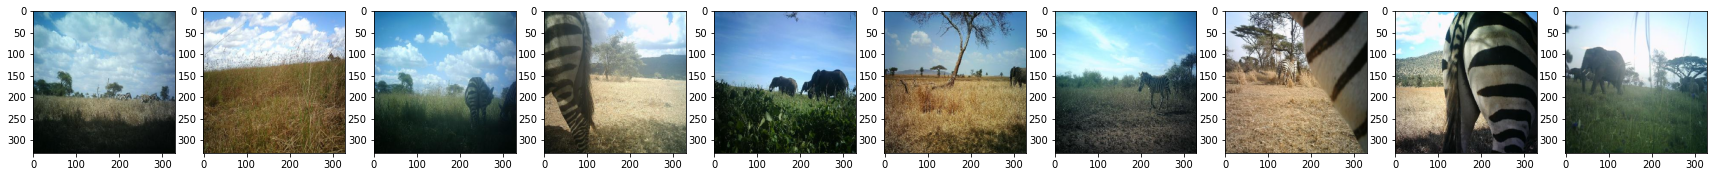

In [313]:
fig, ax = plt.subplots(1,10, figsize = (30,50))

directory = r'data/Valid'
np.random.seed(2022)
elephant_or_zebra = ['elephant_valid','zebra_valid']

for i in range(10):
    rand_animal =np.random.randint(2)
    folder = os.path.join(directory,elephant_or_zebra[rand_animal])
    rand_image = np.random.randint(1000)
    ax[i].imshow(io.imread(os.path.join(folder,os.listdir(folder)[rand_image])))
    
plt.show()

Create training set

In [349]:
category_train_dir_labels = ['Elephant_train', 'Zebra_train']
category_valid_dir_labels = ['Elephant_valid', 'Zebra_valid']
category_test_dir_labels = ['Elephant_test', 'Zebra_test']

train_directory =r'data/train/'
valid_directory =r'data/valid/'
test_directory =r'data/test/'

labels = ['elephant','zebra']

train_data = []

for category_label in category_train_dir_labels:
    folder = os.path.join(train_directory,category_label)
    label=category_train_dir_labels.index(category_label)
    
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        
        img_arr =resize(
            crop( 
                color.rgb2gray(
                    np.fliplr(
                        io.imread(img_path)
                    )
                ),
                50
            ),
            (100,100)
        )   
        train_data.append([img_arr,label])




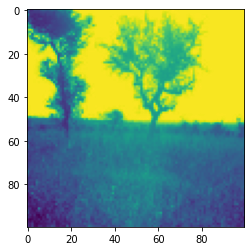

In [350]:
plt.imshow(train_data[0][0])


Create Validation set

In [342]:
valid_data = []
for category_label in category_valid_dir_labels:
    folder = os.path.join(valid_directory,category_label)
    label=category_valid_dir_labels.index(category_label)
    
    for img in os.listdir(folder):
        
        img_path=os.path.join(folder,img)
        # img_arr =cv2.resize(cv2.imread(img_path),(330,330))
        img_arr = color.rgb2gray(resize(np.fliplr(io.imread(img_path)),(100,100)))
        valid_data.append([img_arr,label])



Create Test set

In [316]:
test_data = []
for category_label in category_test_dir_labels:
    folder = os.path.join(test_directory,category_label)
    label=category_test_dir_labels.index(category_label)
    
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr =color.rgb2gray(resize(io.imread(img_path),(100,100)))
        
        test_data.append([img_arr,label])


Shuffle the sets so that they are in random order

In [317]:
random.seed(2022)
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(valid_data)


Create numpy arrays of all X and y sets

In [343]:
X_train = []
y_train = []
for feature, label in train_data:
    X_train.append(feature)
    y_train.append(label)

X_valid = []
y_valid = []
for feature, label in valid_data:
    X_valid.append(feature)
    y_valid.append(label)

X_test = []
y_test = []
for feature, label in test_data:
    X_test.append(feature)
    y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_valid.shape)


(2000, 100, 100)


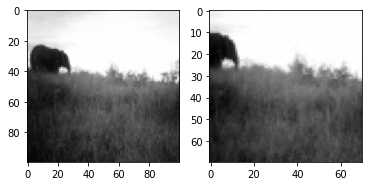

In [319]:
fig, ax = plt.subplots(1,2)


ax[0].imshow(X_train[0],cmap=plt.cm.gray)
ax[1].imshow(crop(X_train[0],15),cmap = plt.cm.gray)

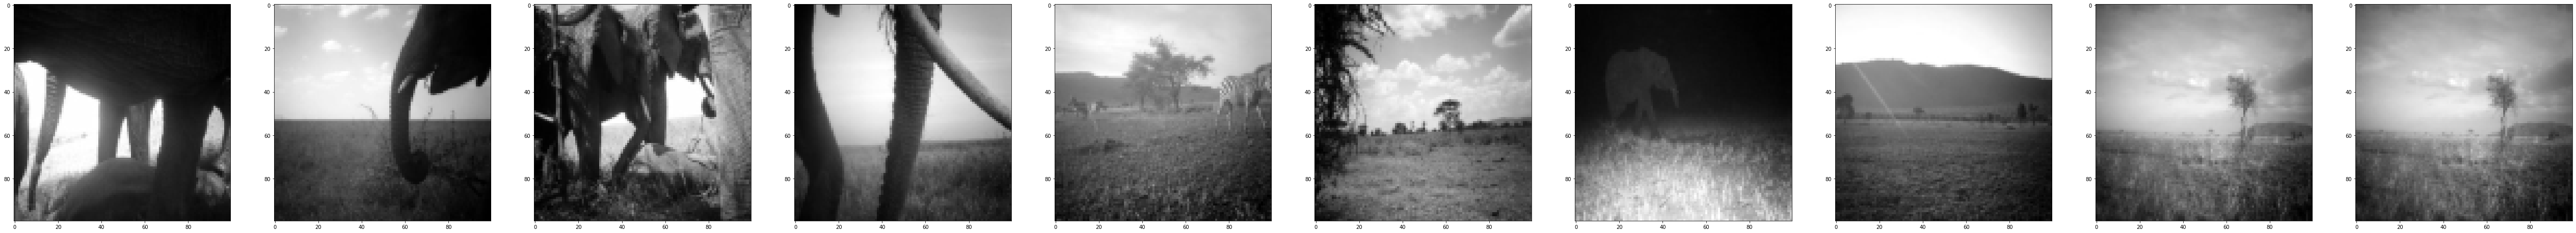

(2000, 100, 100)

In [353]:
fig, ax = plt.subplots(1,10, figsize = (90,90))

for i in range(10):
    rand_image = np.random.randint(2000)
    ax[i].imshow(X_valid[rand_image],cmap=plt.cm.gray)
    
plt.show()
    
X_valid.shape

Make a function to create a Model

In [321]:
def createModel(opt = 'adam',number_of_layers = 1 ):
    model = Sequential()
    
    for i in range(number_of_layers):
        model.add(Conv2D(32,(3,3),activation='relu',padding='same', input_shape = (100,100,1)))
        model.add(MaxPool2D((2,2)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

model = createModel()
history = model.fit(X_train,y_train, epochs = 10,validation_data=(X_valid,y_valid), batch_size=64)




Epoch 1/10
157/157 [==============================] - 63s 399ms/step - loss: 0.4775 - accuracy: 0.7908 - val_loss: 0.2736 - val_accuracy: 0.8950
Epoch 2/10
157/157 [==============================] - 64s 411ms/step - loss: 0.2318 - accuracy: 0.9160 - val_loss: 0.2155 - val_accuracy: 0.9130
Epoch 3/10
157/157 [==============================] - 54s 345ms/step - loss: 0.1692 - accuracy: 0.9408 - val_loss: 0.1875 - val_accuracy: 0.9255
Epoch 4/10
157/157 [==============================] - 53s 338ms/step - loss: 0.1372 - accuracy: 0.9526 - val_loss: 0.1782 - val_accuracy: 0.9300
Epoch 5/10
157/157 [==============================] - 62s 396ms/step - loss: 0.1075 - accuracy: 0.9633 - val_loss: 0.1651 - val_accuracy: 0.9355
Epoch 6/10
157/157 [==============================] - 59s 374ms/step - loss: 0.0875 - accuracy: 0.9715 - val_loss: 0.1769 - val_accuracy: 0.9325
Epoch 7/10
157/157 [==============================] - 54s 343ms/step - loss: 0.0651 - accuracy: 0.9795 - val_loss: 0.1518 - val_ac

In [322]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 5s 84ms/step - loss: 0.1750 - accuracy: 0.9460


[0.17496997117996216, 0.9459999799728394]

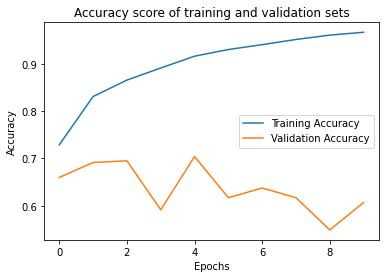

In [352]:

plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Accuracy score of training and validation sets")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()

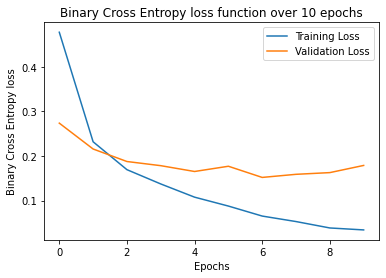

In [324]:
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Binary Cross Entropy loss function over 10 epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross Entropy loss")
plt.legend()
plt.show()

63/63 [==============================] - 6s 92ms/step


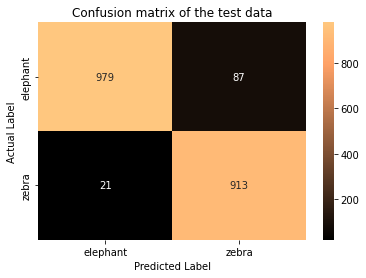

In [325]:
fig, ax = plt.subplots()
y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

sns.heatmap(
        confusion_matrix(y_pred, y_test), #The confusion matrix
        fmt='d',
        cmap=plt.cm.copper,
        annot=True,
        yticklabels=['elephant','zebra'],
        xticklabels=['elephant','zebra'],
        
    )
ax.set_ylabel('Actual Label')
ax.set_xlabel('Predicted Label')
ax.set_title('Confusion matrix of the test data')

plt.show()

In [326]:
train_data

[[array([[0.8157053 , 0.821312  , 0.82500579, ..., 0.87827679, 0.87727914,
          0.87507213],
         [0.83446497, 0.83530453, 0.83500635, ..., 0.88459551, 0.88480896,
          0.88121486],
         [0.83480778, 0.8392238 , 0.84249136, ..., 0.88631722, 0.89271597,
          0.89732837],
         ...,
         [0.0791964 , 0.05070941, 0.07907872, ..., 0.15404794, 0.19184814,
          0.17654773],
         [0.06507695, 0.05429372, 0.08433199, ..., 0.14957689, 0.20413327,
          0.17612018],
         [0.04473842, 0.05090653, 0.09305111, ..., 0.13943715, 0.18284498,
          0.21158802]]),
  0],
 [array([[0.48626638, 0.48960807, 0.4877514 , ..., 0.03558539, 0.03626273,
          0.06587785],
         [0.49041991, 0.49416982, 0.49504531, ..., 0.03322028, 0.03680473,
          0.04460647],
         [0.49789862, 0.49943362, 0.49968746, ..., 0.04000421, 0.0501102 ,
          0.03648869],
         ...,
         [0.48464381, 0.4651094 , 0.42081315, ..., 0.4252383 , 0.39125792,
       

In [354]:
modelsgd = createModel(opt=SGD(momentum=0.9, nesterov=True))
history = modelsgd.fit(X_train,y_train, epochs = 10,validation_data=(X_valid,y_valid), batch_size=64)

Epoch 1/10
157/157 [==============================] - 148s 941ms/step - loss: 0.5079 - accuracy: 0.7321 - val_loss: 0.5865 - val_accuracy: 0.6940
Epoch 2/10
157/157 [==============================] - 212s 1s/step - loss: 0.3783 - accuracy: 0.8307 - val_loss: 0.8414 - val_accuracy: 0.5920
Epoch 3/10
157/157 [==============================] - 147s 931ms/step - loss: 0.3137 - accuracy: 0.8682 - val_loss: 0.9630 - val_accuracy: 0.5785
Epoch 4/10
137/157 [=========================>....] - ETA: 16s - loss: 0.2689 - accuracy: 0.8897

# Just some extra notes

Sigmoid for a single neuron, softmax when multiple output neurons

binary crossentropy as opposed to categorical corssentropy as binary classification problem
	-crossentropy for classification problems

relu is the generally accepted activation function


adam because adaptive. SGD would have need to do more intense hyperparamter tuning with learning rate
but adams performs sufficiently 